# Importing Libraries

In [ ]:
from read_data import combine_all, combine_category, read_data

In [ ]:
from textblob import TextBlob
import seaborn as sns

# Scrapped Data

In [ ]:
df=combine_all()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101345 entries, 0 to 60532
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Name         1101261 non-null  object
 1   Comment      1101078 non-null  object
 2   Time         1101345 non-null  object
 3   Likes        1101345 non-null  int64 
 4   Reply Count  1101345 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 50.4+ MB


# Data Cleaning

In [ ]:
df["Comment"]=df["Comment"].astype(str)

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# Performing Sentiment Analysis

In [ ]:
# calculating the type polarity for the comments
def sentiment(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Polarity'] = df['Comment'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['Analysis'] = df['Polarity'].apply(sentiment)

In [ ]:
df.to_csv('TextBlob.csv')

# Visualisations

<AxesSubplot:xlabel='Analysis', ylabel='count'>

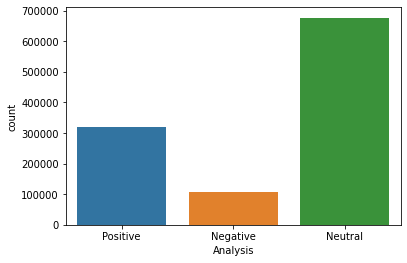

In [ ]:
# Displaying the types of comments
sns.countplot(x='Analysis', data=df)